In [11]:
import perf
import pathlib
import pandas
import altair

In [105]:
def get_items():
    for path in pathlib.Path('.').glob("*.json"):
        try:
            _, reduced = path.stem.split('-', 2)
        except ValueError:
            continue
        is_reduced = reduced == 'reduced'
        benchmark = perf.Benchmark.load(str(path))
        n = int(benchmark.get_name())
        for value in benchmark.get_values():
            yield {"n": n, "time": value * 1000, "reduced": is_reduced}


In [106]:
df = pandas.DataFrame(get_items())
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 3 columns):
n          5040 non-null int64
reduced    5040 non-null bool
time       5040 non-null float64
dtypes: bool(1), float64(1), int64(1)
memory usage: 83.8 KB


,n,reduced,time
0,140,False,0.556362
1,140,False,0.546197
2,140,False,0.545952
3,140,False,0.545766
4,140,False,0.546221


In [108]:
altair.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

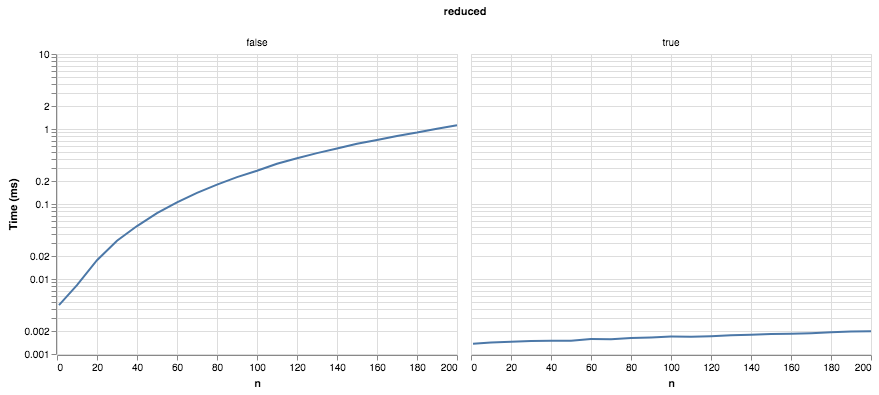

In [109]:
points = altair.Chart(df).mark_line().encode(
    altair.Y(
        'mean(time)',
        scale=altair.Scale(type='log', zero=False),
        axis=altair.Axis(title='Time (ms)'),
    ),
    x='n',
    column='reduced',
#     column='n',
)


points

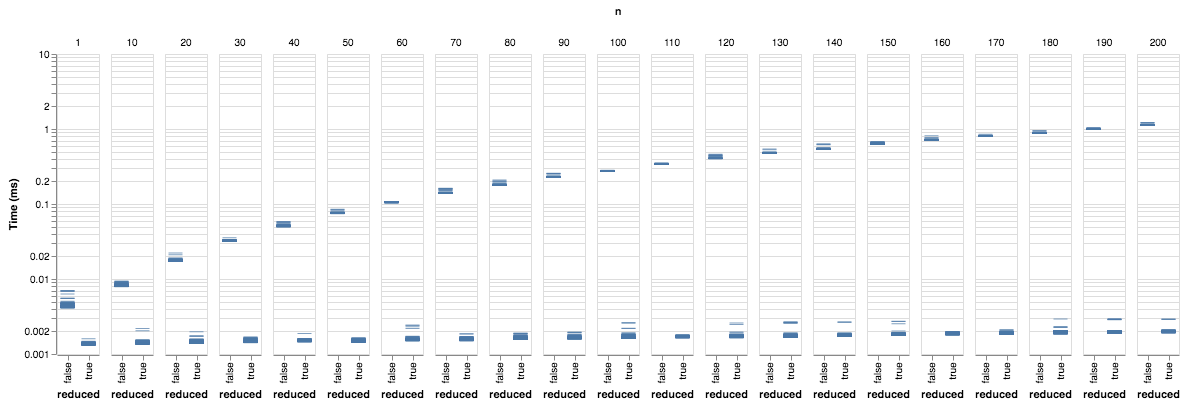

In [110]:
points = altair.Chart(df).mark_tick().encode(
    altair.Y(
        'time',
        scale=altair.Scale(type='log', zero=False),
        axis=altair.Axis(title='Time (ms)'),
    ),
    x='reduced',
#     color='reduced',
    column='n',
)


points

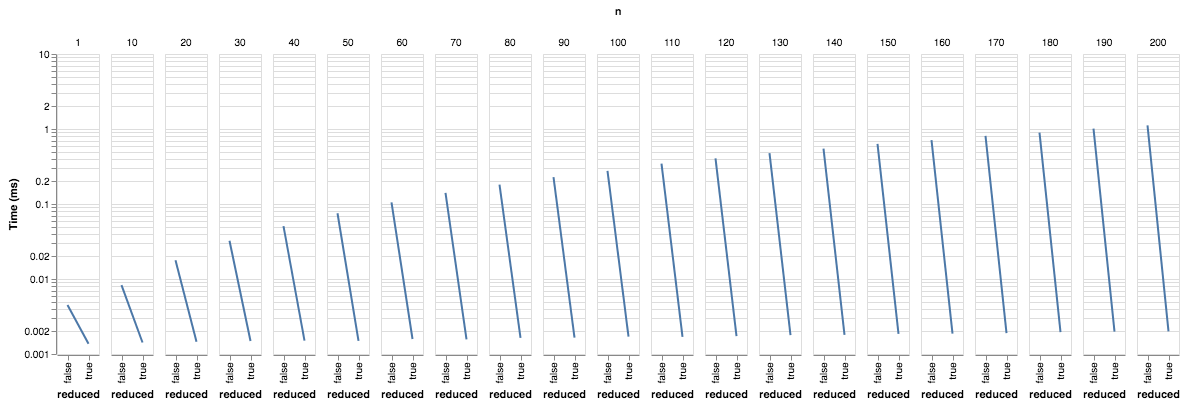

In [111]:
points = altair.Chart(df).mark_line().encode(
    altair.Y(
        'mean(time)',
        scale=altair.Scale(type='log', zero=False),
        axis=altair.Axis(title='Time (ms)'),
    ),
    x='reduced',
    column='n',
)
points

In [113]:
import numpy as np

In [114]:
ratios = pandas.DataFrame({
    "ratio": df.groupby(['n']).apply(lambda x: np.mean(x[x.reduced == True]['time']) / np.mean(x[x.reduced == False]['time']))
}).reset_index()
ratios.head()

,n,ratio
0,1,0.304804
1,10,0.171868
2,20,0.081862
3,30,0.046036
4,40,0.029627


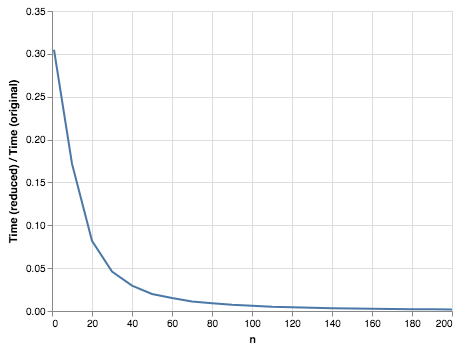

In [115]:
altair.Chart(ratios).mark_line().encode(
    altair.Y(
        'ratio',
        scale=altair.Scale(zero=False),
        axis=altair.Axis(title='Time (reduced) / Time (original)'),
    ),
    x='n',
)

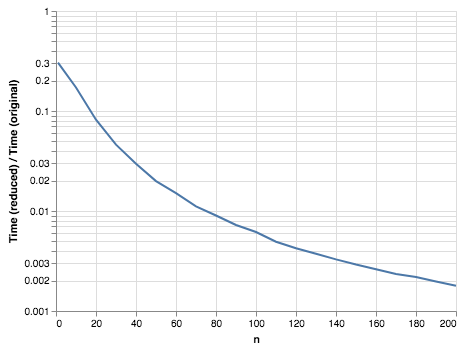

In [116]:
altair.Chart(ratios).mark_line().encode(
    altair.Y(
        'ratio',
        scale=altair.Scale(type='log', zero=False),
        axis=altair.Axis(title='Time (reduced) / Time (original)'),
    ),
    x='n',
)